<h2><u>Data Science Using Python</u></h2>

# Module 8 – Project Walkthrough

# **Stock Market Analysis** 

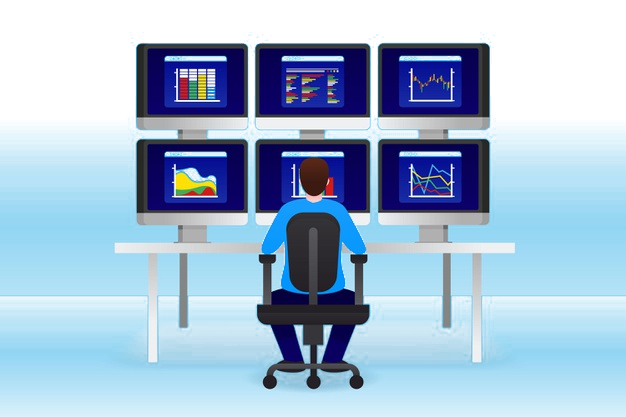

### Business Scenario:

Finance is probably one of the first to catch on to this trend with a rise in the penetration of analytics into many aspects of our lives. 
However, we will analyse data from the stock market for some technology stocks such as **Apple**, **Google**,  **Amazon** and **Microsoft**



### Objective:

Use Python libraries such as Pandas, Seaborn and Matplotlib to extract and analyse the information, visualise it, and look at different ways to analyse the risk of a stock, based on its performance history

### About the Data:

The stocks I have chosen are from various industries and market caps namely,


*   Apple
*   Google
*   Microsoft
*   Amazon

For the start, we shall investigate the Amazon stock individually and then move on to the combined analysis. 

To know more about stocks and their data please visit the below link: https://in.finance.yahoo.com/ 





Here is some of the Questions we shall try to answer

*   Read the Data from Yahoo finance website directly
*   Perform cleaning 
*   What was the change in stock price over time? 
*   Visualize the change in a stock’s volume being traded, over time?
*   What was the moving average of various stocks?
*   What was the daily return average of a stock?
*   Add a new column ‘Trend’ whose values are based on the 'Daily Return'
*   Visualize the trend frequency through a Pie Chart
*   What was the correlation between daily returns of different stocks?










### Import the required Libraries

In [1]:
#Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

#Visualisation imports
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
#!pip install pandas-datareader
import pandas_datareader.data as web
from datetime import datetime



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4


To know more about Pandas DataReader click here: https://pandas-datareader.readthedocs.io/en/latest/ 

Creating a list with the stock names, for future looping

In [2]:
#We're going to analyse stock info for Apple, Google, Microsoft and Amazon.
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [3]:
#Setting the end date to today
end = datetime.now()

In [4]:
#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day)

#### **Reading the Data from Yahoo finance website directly**

In [5]:
#Using Yahoo Finance to grab the stock data
for stock in tech_list:
    globals()[stock] = web.DataReader(stock,'yahoo',start,end) #The globals method sets the stock name to a global variable

TypeError: string indices must be integers

Thanks to the globals method, **Amazon**’s stock data will be stored in the AMZN global variable dataframe. Let’s see if it works

In [ ]:
AMZN

### Inference:

Now, we have successfully grabbed the data from Yahoo Finance!!

Amazon's Stock’s minimum, maximum, and average price was 

In [ ]:
AMZN.describe()

#### **Cleaning the Data**

Adding a new column named **Company** in each Dataframe

In [ ]:
AAPL['Company'] = 'Apple'
GOOG['Company'] = 'Google'
AMZN['Company'] = 'Amazon'
MSFT['Company'] = 'Microsoft'

Merging all the Dataframe together to create a single Dataframe

In [ ]:
stocks=pd.concat([AAPL,AMZN,GOOG,MSFT])

In [ ]:
stocks.head()

Store the data in a CSV file (if required)

In [ ]:
stocks.to_csv('Stocks.csv',index=False)

Checking the basic information of the data

In [ ]:
stocks.info()

Checking for null values

In [ ]:
stocks.isna().sum()

### Inference:

No missing info in the dataframe 

Checking for duplicates

In [ ]:
stocks.duplicated().sum()

### Inference:

No duplicate record in the dataframe 

#### **What was the change in a stock’s price over time?**

In [ ]:
Companies = stocks['Company'].drop_duplicates().values
print(Companies)

In [ ]:
grouped = stocks.groupby('Company')
fig, ax = plt.subplots()

for comp in Companies:
    stock = grouped.get_group(comp)
    stock['Adj Close'].plot(legend=True,figsize=(12,5), ax=ax)

ax.legend(Companies)

Let us look at the price trend of individual stocks

In [ ]:
AMZN['Adj Close'].plot(legend=True,figsize=(12,5),title = "Amazon's Stock Trend")

In [ ]:
#Plotting the stock's adjusted closing price using pandas
MSFT['Adj Close'].plot(legend=True,figsize=(12,5),title = "Microsoft's Stock Trend")

### Inference:

MSFT stock notched a record high of 349.67 on Nov. 22. But it tumbled during the recent stock market correction. It ended the regular session May 6 at 274.73.

#### Visualize the change in a stock’s volume being traded, over time

In [ ]:
#Plotting the total volume being traded over time
AMZN['Volume'].plot(legend=True,figsize=(12,5))

### Inference:

As we can observe, there was a spike in the volume in the Feb 2022 and then again in th month of May.

#### **What was the moving average of various stocks?**

In [ ]:
ma_per_day = [20,50,100]

for ma in ma_per_day:
    column_name = "MA for %s days" %(str(ma))
    
    AMZN[column_name] = AMZN['Adj Close'].rolling(window=ma,center=False).mean()

In [ ]:
AMZN.tail()

In [ ]:
AMZN[['Adj Close','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(12,5))

### Inference:

Moving averages for more days have a smoother plot, as they’re less reliable on daily fluctuations. Still we can see that Amazon’s stock wahas been seeing a slight dip this year. 

#### **What was the daily return average of a stock?**

In [ ]:
#The daily return column can be created by using the percentage change over the adjusted closing price
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()

In [ ]:
AMZN['Daily Return'].tail()

In [ ]:
#Plotting the daily return
AMZN['Daily Return'].plot(figsize=(14,5),legend=True)

In [ ]:
f,ax=plt.subplots(figsize=(20,10))
sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='red',kde=False,ax=ax)

### Inference:

Positive daily returns are almost as frequent as negative returns for Amazon currently.

#### **Add a new column ‘Trend’ whose values are based on the 'Daily Return'**


In [ ]:
def trend(x):
  if x > -0.015 and x <= 0.015:
    return 'Slight or No change'
  elif x > 0.015 and x <= 0.04:
    return 'Slight Positive'
  elif x < -0.015 and x >= -0.4:
    return 'Slight Negative'
  elif x > 0.04 and x <= 0.06:
    return 'Positive'
  elif x < -0.04 and x >= -0.06:
    return 'Negative'
  elif x > 0.06 and x <= 0.07:
    return 'Among top gainers'
  elif x < -0.06 and x >= -0.07:
    return 'Among top losers'
  elif x > 0.07:
    return 'Bull run'
  elif x <= -0.07:
    return 'Bear drop'
AMZN['Trend']= np.zeros(AMZN['Daily Return'].count()+1)
AMZN['Trend']= AMZN['Daily Return'].apply(lambda x:trend(x))
AMZN.tail(5)

We can visualize to see how the stock was performing for past and this year using a Pie chart

#### **Visualize the trend frequency through a Pie Chart**

In [ ]:
labels=AMZN.Trend.value_counts().index
colors=["olive","orange","hotpink","slateblue","y","lime"]
sizes=AMZN.Trend.value_counts().values
plt.figure(figsize=(9,9))
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
plt.title("Trend Frequency using a Pie Chart",color="saddlebrown",fontsize=15)

### Inference:

The Amazon stock was in the bull run for just about 0.4% of the time,for about 3.2% of the time period, the stock has performed positively on a given day. Likewise, for most period of time (about 60.6%) the stock showed a very slight or no change in the price.

#### **What was the correlation between daily returns of different stocks?**

Merging the columns of all companies Adjacent close 

In [ ]:
all_adj = pd.concat([AAPL['Adj Close'] ,GOOG['Adj Close'],AMZN['Adj Close'],MSFT['Adj Close']], axis = 1)

In [ ]:
all_adj.columns = ['Apple','Google','Amazon','Microsoft']

In [ ]:
all_adj

In [ ]:
pct_df = all_adj.pct_change()
pct_df.tail()

In [ ]:
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(pct_df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax) 

### Inference:

Microsoft seems to have the highest correlation with Apple as well as Google. But another interesting thing to note is that all tech companies that we explored are positively correlated.

### **Note:**
Here the Analysis is shown with respect to Stock. You can always use other companies stocks and Explore more on the Analysis